In [3]:
#Importaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

## RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

### OBTENER LOS DATOS

In [4]:
# Abre el archivo original y lee su contenido
with open("../../../datos/creditcard.csv", 'r', encoding="utf-8") as file:
    lines = file.readlines()

# Eliminar todas las comillas dobles del archivo
lines = [line.replace('"', '') for line in lines]

# Guardar el archivo limpio sin comillas dobles
with open("../../../datos/creditcard_fixed.csv", 'w', encoding="utf-8") as file:
    for line in lines:
        file.write(line)  # Escribimos cada línea ya sin comillas dobles

# Leer el archivo corregido usando el delimitador explícito ';'
datos = pd.read_csv("../../../datos/creditcard_fixed.csv", delimiter=";", encoding="utf-8")


### EXPLORAR LOS DATOS

Muestra las primeras líneas del dataframe

In [5]:
datos.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


¿Cuántas columnas hay? ¿De que tipo? ¿Cuántos valores no nulos tiene cada columna?

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Muestra las estadísticas básicas de los atributos numéricos

In [7]:
datos.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Diferencias de datos en la columna a adivinar, generará problemas a la hora de entrenar el modelo (no esta balanceado)

In [8]:
print(datos["Class"].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


Respresenta los atributos diagrama de barras para ver sus distribuciones: 

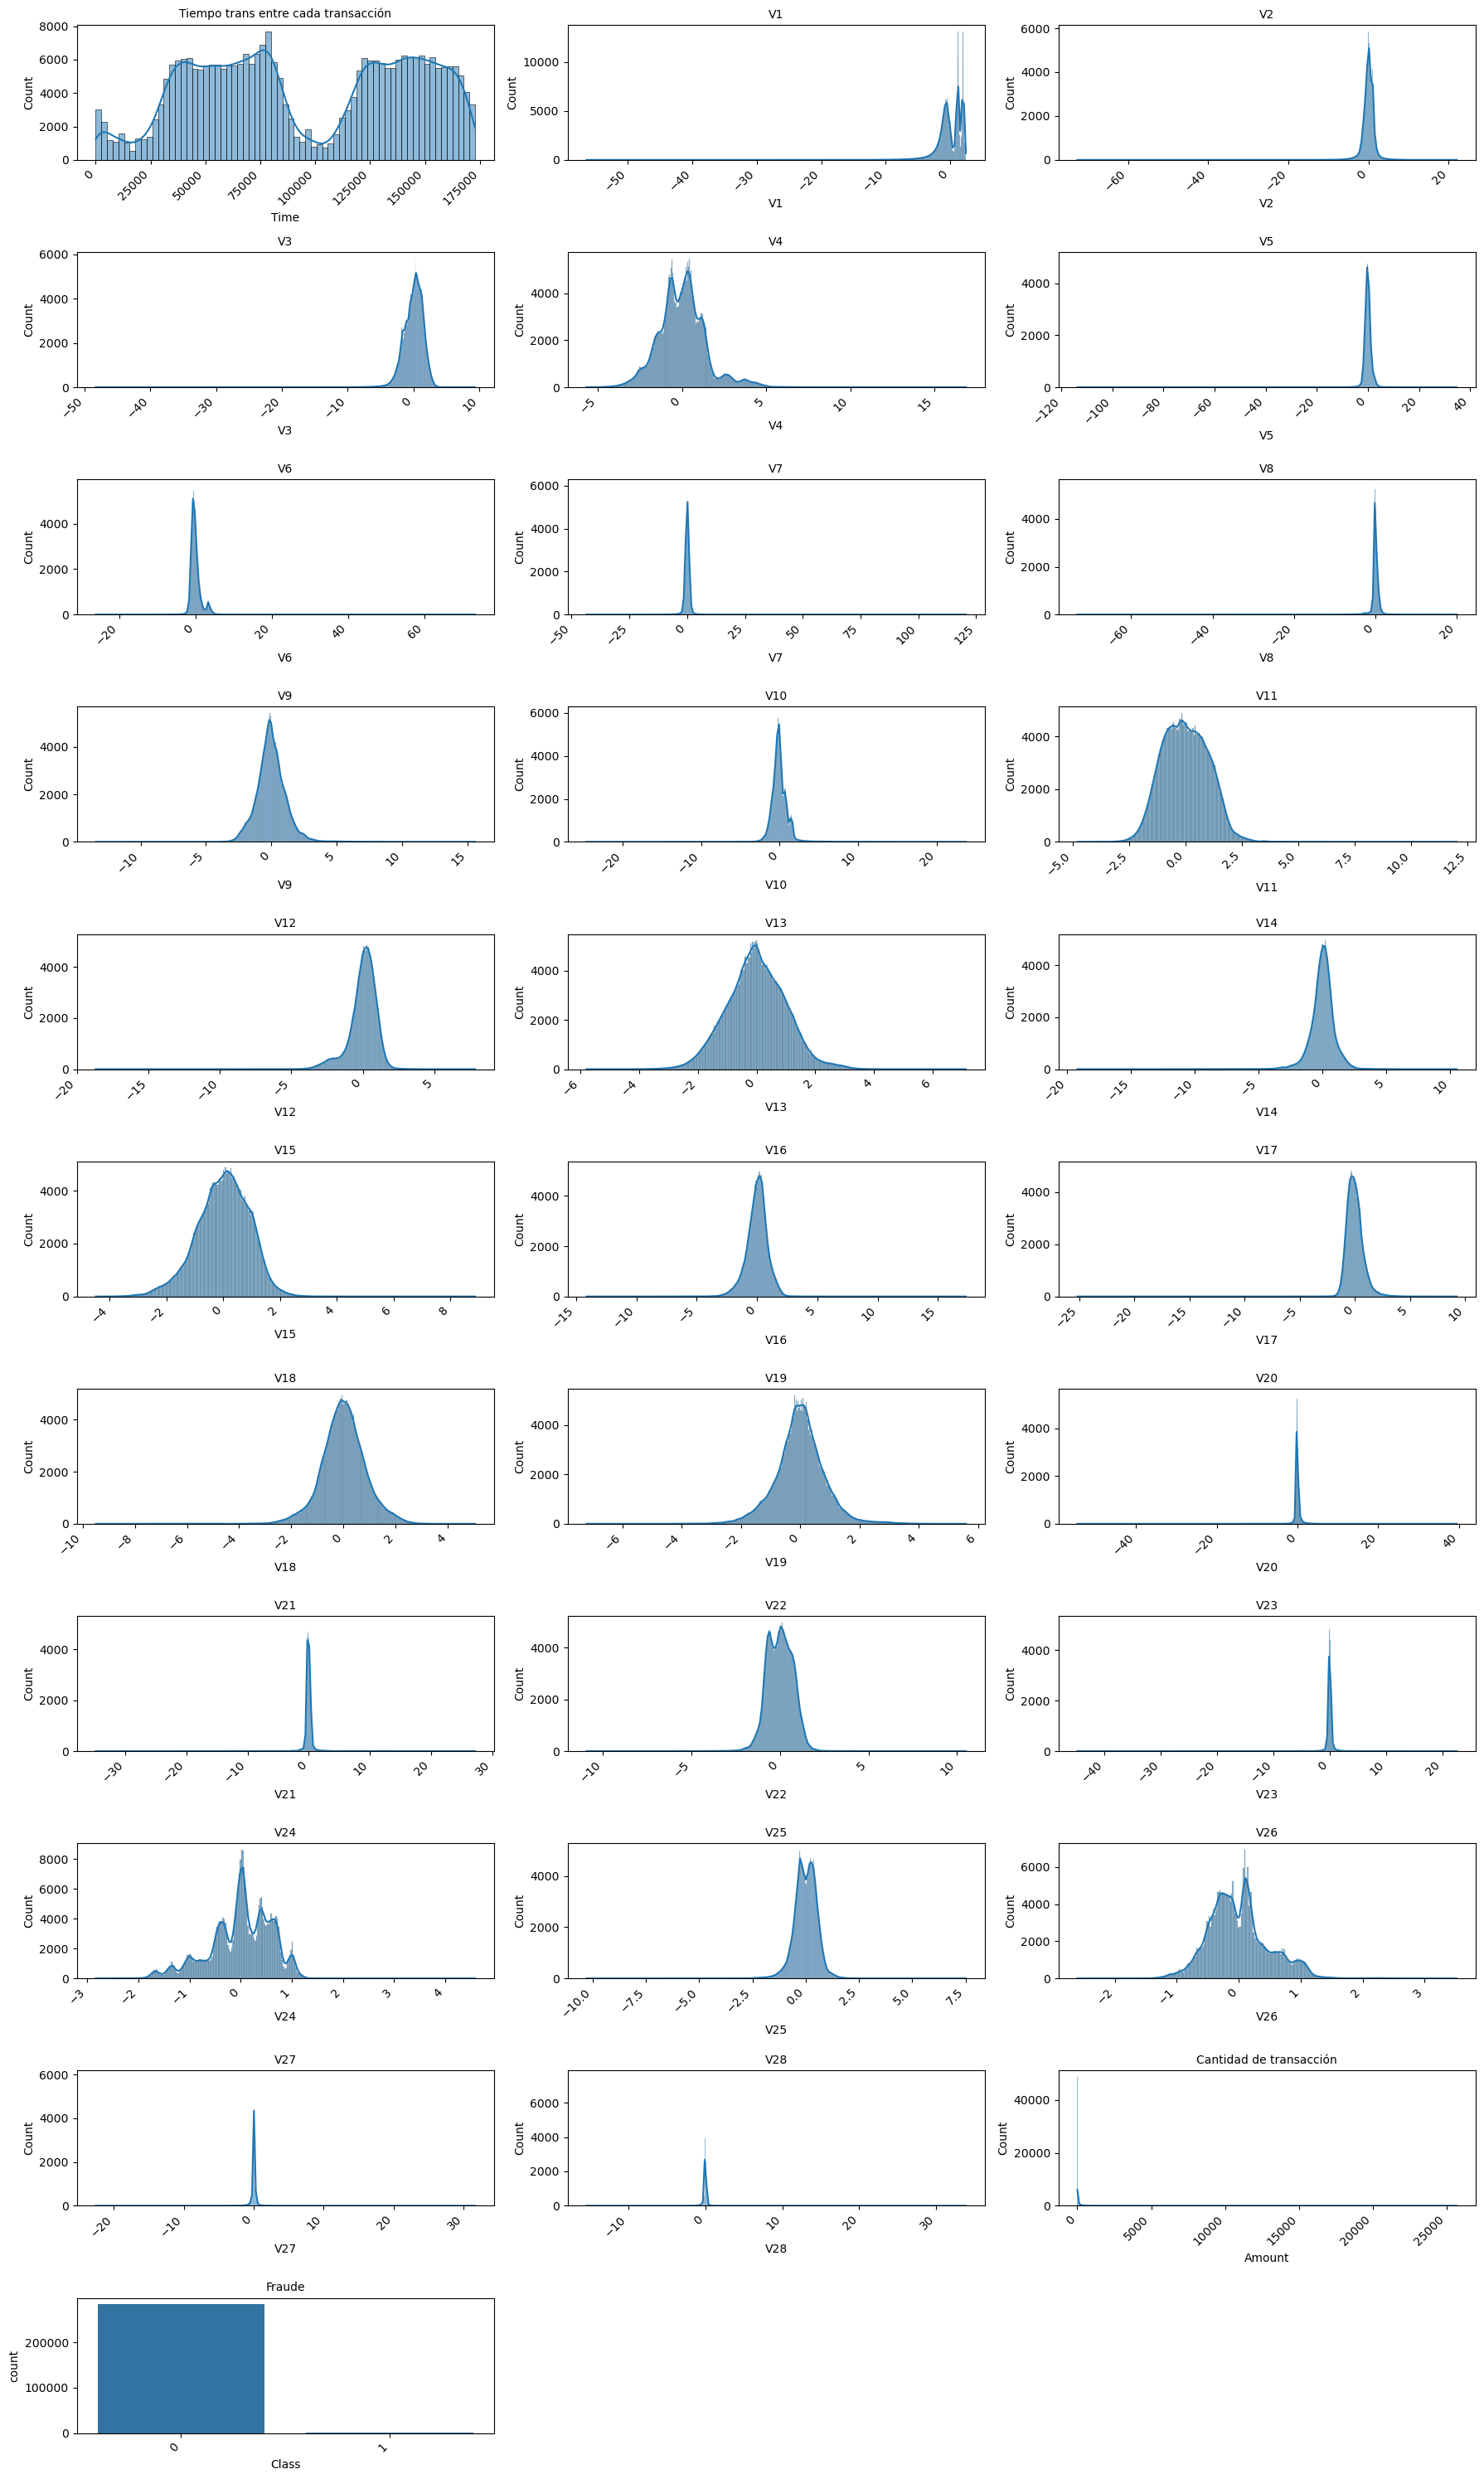

In [9]:
# Lista de columnas en el DataFrame
columnas = datos.columns.tolist()

# Crear la lista de tuplas con las descripciones personalizadas
columns = [
    (col, 
     'Fraude' if col == 'Class' else
     'Tiempo trans entre cada transacción' if col == 'Time' else
     'Cantidad de transacción' if col == 'Amount' else
     col) 
    for col in columnas
]

# Ajustar el tamaño de la figura (11 filas, 3 columnas para 33 subgráficas, aunque solo usaremos 31)
plt.figure(figsize=(18, 30))

# Recorrer las columnas y graficar
for i, (col, title) in enumerate(columns, start=1):
    plt.subplot(11, 3, i)  # Layout: 11 filas, 3 columnas para 33 subgráficas
    
    # Si la columna es 'Class', usar countplot
    if col == 'Class':
        sns.countplot(data=datos, x=col)
    # Para las demás columnas, usar histplot
    else:
        sns.histplot(datos[col], kde=True) 
    
    # Añadir título con la descripción de la columna
    plt.title(title, fontsize=10)
    plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor legibilidad

# Ajustar el espacio entre las subgráficas
plt.tight_layout()

# Mostrar la gráfica
plt.show()


Matriz de correlación

In [10]:
correlacion = datos.corr()
correlacion.style.background_gradient()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117396,-0.010593,-0.419618,-0.105260,0.173072,-0.063016,0.084714,-0.036949,-0.008660,0.030617,-0.247689,0.124348,-0.065902,-0.098757,-0.183453,0.011903,-0.073297,0.090438,0.028975,-0.050866,0.044736,0.144059,0.051142,-0.016182,-0.233083,-0.041407,-0.005135,-0.009413,-0.010596,-0.012323
V1,0.117396,1.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.227709,-0.101347
V2,-0.010593,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.531409,0.091289
V3,-0.419618,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.210880,-0.192961
V4,-0.105260,-0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.098732,0.133447
V5,0.173072,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.386356,-0.094974
V6,-0.063016,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.215981,-0.043643
V7,0.084714,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.397311,-0.187257
V8,-0.036949,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.103079,0.019875
V9,-0.008660,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.044246,-0.097733


### DIVIDIR LOS DATOS

In [7]:
# Dividir los datos en X (características) y y (etiquetas)
X = datos.drop('Class', axis=1)
y = datos['Class']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Preparar los datos

Realizar SMOTE en el preprocesamiento para balancear los datos

In [8]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

Comprobacion de que el balanceo funciona

In [9]:
print("Distribución de clases despues SMOTE en el conjunto de entrenamiento:")
print(y_train.value_counts())

Distribución de clases despues SMOTE en el conjunto de entrenamiento:
Class
0    227451
1    227451
Name: count, dtype: int64


Pipeline de preprocesamiento

In [10]:
# Crear la pipeline de preprocesamiento
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes
    ('scaler', StandardScaler())  # Escalar las características
])


Estoy teniendo problemas para trabajar con tanta cantidad de datos (medio millon de filas), vamos a tener que tomar una muestra menor, como 100.000, dado a que nuestro hardware llega a lo que llega

In [16]:
from sklearn.utils import shuffle

# Número de muestras deseadas por clase
sample_size = 50000

# Obtener las muestras de cada clase de X_train y y_train
X_train_class_0 = X_train[y_train == 0].sample(n=sample_size, random_state=42)
X_train_class_1 = X_train[y_train == 1].sample(n=sample_size, random_state=42)

y_train_class_0 = y_train[y_train == 0].sample(n=sample_size, random_state=42)
y_train_class_1 = y_train[y_train == 1].sample(n=sample_size, random_state=42)

# Combinar las muestras de ambas clases
X_train_sample = pd.concat([X_train_class_0, X_train_class_1])
y_train_sample = pd.concat([y_train_class_0, y_train_class_1])

# Mezclar las filas para que estén aleatoriamente distribuidas
X_train_sample, y_train_sample = shuffle(X_train_sample, y_train_sample, random_state=42)

# Confirmar que las clases siguen balanceadas y verificar el tamaño
print(y_train_sample.value_counts())
print(X_train_sample.shape)


Class
1    50000
0    50000
Name: count, dtype: int64
(100000, 30)


### MODELOS

In [17]:
# Crear la pipeline de modelado (solo preprocesamiento + modelo)
model_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),  # Preprocesamiento de datos
    ('classifier', RandomForestClassifier(random_state=42))  # Modelo de clasificación
])

# Ajustar el modelo con los datos balanceados de entrenamiento
model_pipeline.fit(X_train_sample, y_train_sample)

# Paso 5: Evaluar el modelo en los datos de entrenamiento balanceados
y_pred_train = model_pipeline.predict(X_train_sample)
precision_train = accuracy_score(y_train_sample, y_pred_train)
print(f'Precisión en el conjunto de entrenamiento: {precision_train:.4f}')

# Paso 6: Evaluar el modelo en los datos de prueba (sin aplicar SMOTE a los datos de prueba)
y_pred_test = model_pipeline.predict(X_test)
precision_test = accuracy_score(y_test, y_pred_test)
print(f'Precisión en el conjunto de test: {precision_test:.4f}')


Precisión en el conjunto de entrenamiento: 1.0000
Precisión en el conjunto de test: 0.9992


Vamos a visualizar la curva de ROC para verificar si el modelo solo está intentando acertar, dado a que en el conjunto de test hay bastantes menos verdaderos positivos.

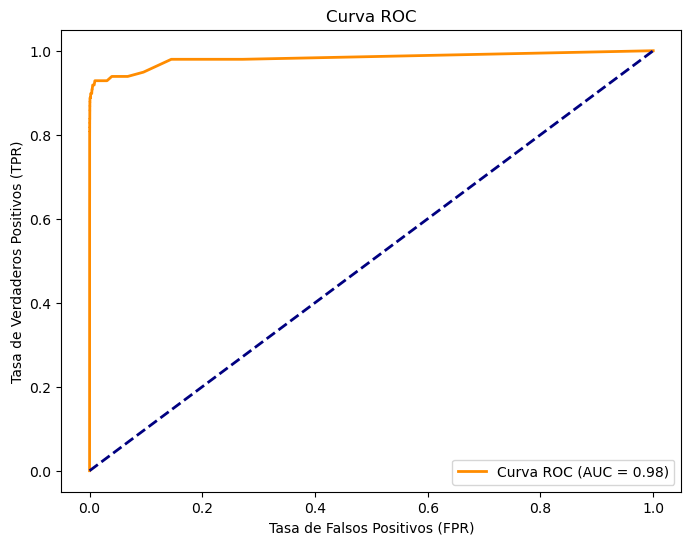

In [18]:
# Predecir las probabilidades del modelo para la clase positiva (1)
from sklearn.metrics import auc, roc_curve

y_score = model_pipeline.predict_proba(X_test)[:, 1]  # Para clasificación binaria

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Dibujar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal (no discriminativa)
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Parece que nuestro modelos es muy preciso, pero vamos a probar otros modelos y comparar los resultados

Entrenando modelo: Decision Tree
Precisión en el conjunto de entrenamiento: 1.0000
Precisión en el conjunto de test: 0.9944


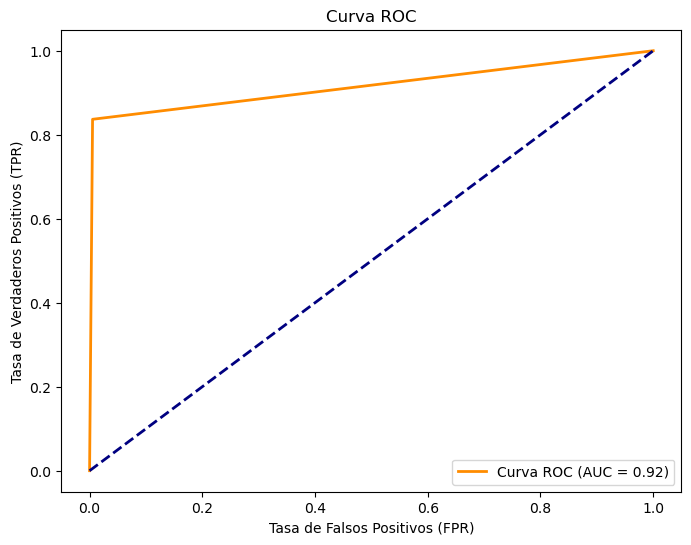

Entrenando modelo: Logistic Regresion
Precisión en el conjunto de entrenamiento: 0.9791
Precisión en el conjunto de test: 0.9913


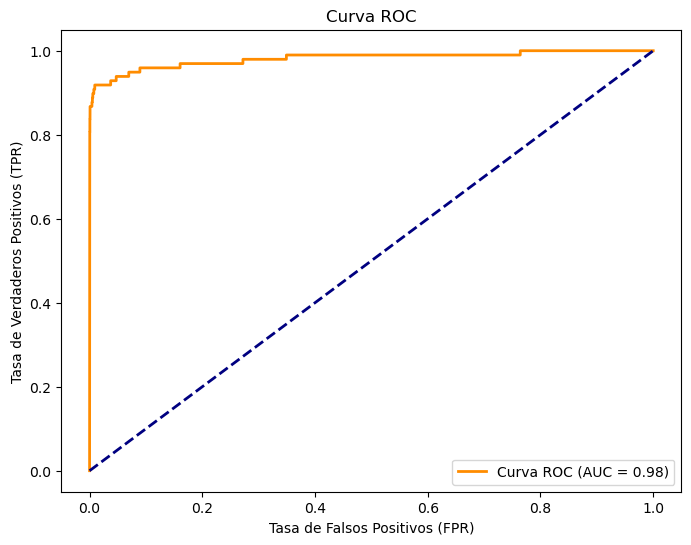

Entrenando modelo: K-Neighbours
Precisión en el conjunto de entrenamiento: 1.0000
Precisión en el conjunto de test: 0.9978


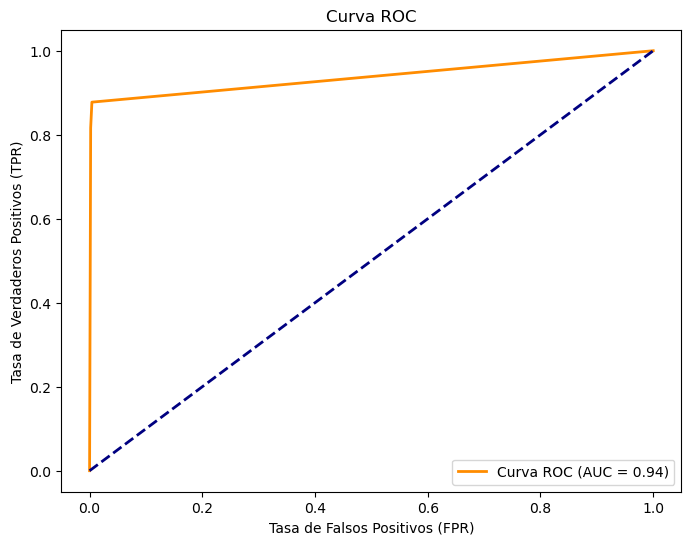

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import auc, roc_curve

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regresion': LogisticRegression(random_state=42),
    #'SVC': SVC(kernel='linear', probability=True, random_state=42) tarda más de 2h
    'K-Neighbours':KNeighborsClassifier(n_neighbors=2) # k=2 porque es binario
}
for name,model in models.items():
    print(f"Entrenando modelo: {name}")
    # Crear la pipeline de modelado (solo preprocesamiento + modelo)
    model_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),  # Preprocesamiento de datos
    ('classifier', model)  # Modelo de clasificación
    ])

    # Ajustar el modelo con los datos balanceados de entrenamiento
    model_pipeline.fit(X_train_sample, y_train_sample)

    # Paso 5: Evaluar el modelo en los datos de entrenamiento balanceados
    y_pred_train = model_pipeline.predict(X_train_sample)
    precision_train = accuracy_score(y_train_sample, y_pred_train)
    print(f'Precisión en el conjunto de entrenamiento: {precision_train:.4f}')

    # Paso 6: Evaluar el modelo en los datos de prueba (sin aplicar SMOTE a los datos de prueba)
    y_pred_test = model_pipeline.predict(X_test)
    precision_test = accuracy_score(y_test, y_pred_test)
    print(f'Precisión en el conjunto de test: {precision_test:.4f}')
    y_score = model_pipeline.predict_proba(X_test)[:, 1]  # Para clasificación binaria

    # Calcular la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_score)

    # Calcular el área bajo la curva (AUC)
    roc_auc = auc(fpr, tpr)

    # Dibujar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal (no discriminativa)
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

Parace que random forest sigue siendo nuestro mejor clasificador, vamos a ver si emsamblando los modelos anteriores conseguimos un resultado mejor

Entrenando  LogisticRegression(random_state=42)


/home/iabd/anaconda3/envs/notebook/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9811102138267617
Entrenando  DecisionTreeClassifier(random_state=42)
0.9978582212703205
Entrenando  KNeighborsClassifier(n_neighbors=2)
0.9796706576314034


/home/iabd/anaconda3/envs/notebook/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precisión del conjunto de entrenamiento:  VotingClassifier(estimators=[('log_reg', LogisticRegression(random_state=42)),
                             ('dec_tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('knnc', KNeighborsClassifier(n_neighbors=2))])
Precisión del conjunto de validación:  0.9985253326779256


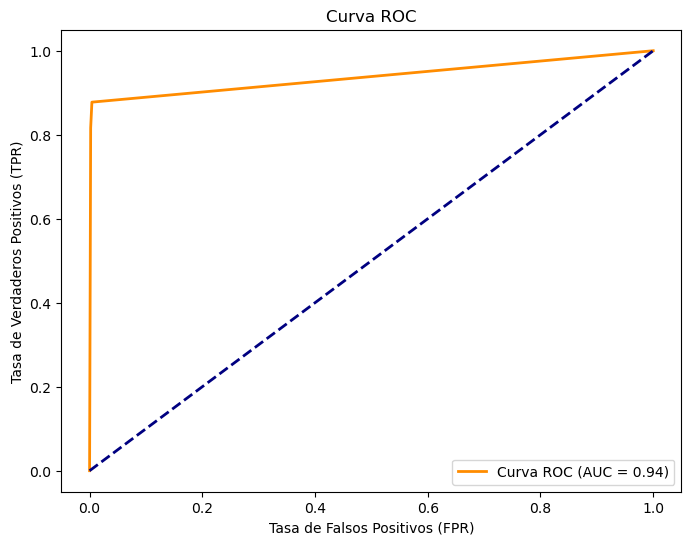

In [21]:
# Creamos los clasificadores
from sklearn.ensemble import VotingClassifier

log_reg = LogisticRegression(random_state=42)
dec_tree = DecisionTreeClassifier(random_state=42)
knnc = KNeighborsClassifier(n_neighbors=2)

classifiers = [log_reg,dec_tree, knnc]
for classifier in classifiers:
    print("Entrenando ", classifier)
    classifier.fit(X_train, y_train)
    print(classifier.score(X_test, y_test))

named_classifiers = [
    ("log_reg", log_reg),
    ("dec_tree", dec_tree),
    ("knnc", knnc)
]

voting = VotingClassifier(named_classifiers)
error_train=voting.fit(X_train, y_train)
error_val=voting.score(X_test, y_test)
print("Precisión del conjunto de entrenamiento: ", error_train)
print("Precisión del conjunto de validación: ", error_val)
y_score_voting = model_pipeline.predict_proba(X_test)[:, 1]  # Para clasificación binaria

# Calcular la curva ROC
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_score_voting)

# Calcular el área bajo la curva (AUC)
roc_auc_voting = auc(fpr_voting, tpr_voting)

# Dibujar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal (no discriminativa)
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

No parece que la curva de ROC de mejores resultados en el voting que con el random forest por su cuenta.
También cabe destacar que reduciendo la muestra de 500.000 a 100.000 ha mejorado el K-neighbours extrañamente, aparte de acelerar el procesamiento en un 500%

## Optimización de hiperparámetros
Vamos a hacer una búsqueda de hiperparametros de RandomForestClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Crear la pipeline de modelado (solo preprocesamiento + modelo)
model_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),  # Preprocesamiento de datos
    ('classifier', RandomForestClassifier(random_state=42))  # Modelo de clasificación
])

# Espacio de búsqueda de hiperparámetros
param_distributions = {
    'classifier__n_estimators': [100, 200, 500],  # Número de árboles en el bosque
    'classifier__max_depth': [10, 20, 30],        # Máxima profundidad de los árboles
    'classifier__min_samples_split': [2, 5, 10],  # Mínimo número de muestras para dividir un nodo
    'classifier__min_samples_leaf': [1, 2, 4],    # Mínimo número de muestras en una hoja
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model_pipeline,
    param_distributions=param_distributions,
    n_iter=20,  # Número de combinaciones a probar
    cv=2,  # Validación cruzada con 2 particiones por limiticaciones de hardware
    verbose=2,  # Mostrar progreso
    random_state=42,
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Ejecutar la búsqueda
random_search.fit(X_train_sample, y_train_sample)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  35.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  37.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  44.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  48.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time= 1.2min
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  36.5s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  36.5s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time= 1.3min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 1.4min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total tim

/home/iabd/anaconda3/envs/notebook/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores hiperparámetros: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}


Vamos a ver por cuanto se ha optimizado nuestro modelo

Precisión en el conjunto de entrenamiento: 1.0000
Precisión en el conjunto de test: 0.9992


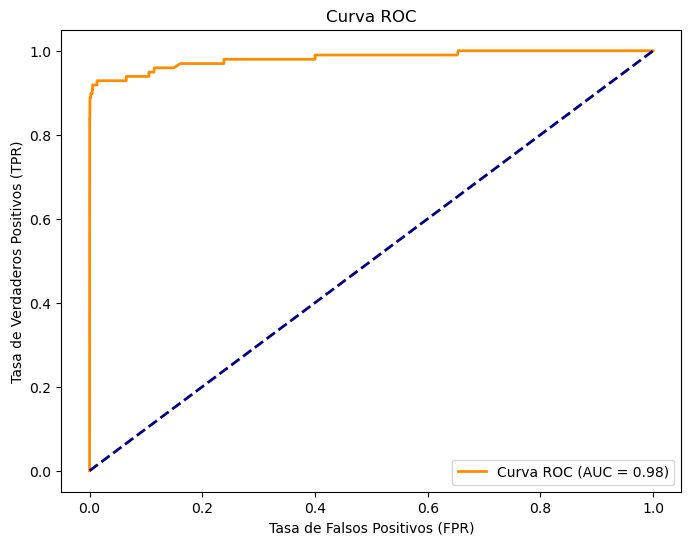

In [ ]:
best_model = random_search.best_estimator_

# Ajustar el modelo con los datos balanceados de entrenamiento
model_pipeline.fit(X_train_sample, y_train_sample)

# Paso 5: Evaluar el modelo en los datos de entrenamiento balanceados
y_pred_train = model_pipeline.predict(X_train_sample)
precision_train = accuracy_score(y_train_sample, y_pred_train)
print(f'Precisión en el conjunto de entrenamiento: {precision_train:.4f}')

# Paso 6: Evaluar el modelo en los datos de prueba (sin aplicar SMOTE a los datos de prueba)
y_pred_test = model_pipeline.predict(X_test)
precision_test = accuracy_score(y_test, y_pred_test)
print(f'Precisión en el conjunto de test: {precision_test:.4f}')
y_score = model_pipeline.predict_proba(X_test)[:, 1]  # Para clasificación binaria

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Dibujar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal (no discriminativa)
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

No parece que se haya optimizado en absoluto el resultado, pero la forma del gráfico ha cambiado ligeramente

## Guardar el modelo
Vamos a guardar el modelo para su uso posterior

In [27]:
import joblib
import os

current_directory = os.getcwd()
relative_path = os.path.join(current_directory, '..', '..', '..', 'recursos', 'modelos', 'creditcard.pkl')
joblib.dump(best_model, relative_path)

['/home/iabd/Documentos/3.3_Proyecto_ML_G4/src/parte1_AS/notebooks/../../../recursos/modelos/creditcard.pkl']